# Code by Kshitij Kumre
### NITK Surathkal (M.Tech in Information Technology)
------------------------------------------------
------------------------------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Performing data Exploration

In [38]:
#Loading the log data and log templates
log_data = pd.read_csv('HealthApp_2k.log_structured.csv')
log_templates = pd.read_csv('HealthApp_2k.log_templates.csv')

In [39]:
#Exploring the data
print(log_data.head())

   LineId                   Time                 Component       Pid  \
0       1  20171223-22:15:29:606                  Step_LSC  30002312   
1       2  20171223-22:15:29:615                  Step_LSC  30002312   
2       3  20171223-22:15:29:633  Step_StandReportReceiver  30002312   
3       4  20171223-22:15:29:635                  Step_LSC  30002312   
4       5  20171223-22:15:29:635     Step_StandStepCounter  30002312   

                                             Content EventId  \
0                            onStandStepChanged 3579     E42   
1                      onExtend:1514038530000 14 0 4     E39   
2  onReceive action: android.intent.action.SCREEN_ON     E41   
3  processHandleBroadcastAction action:android.in...     E43   
4                                  flush sensor data     E12   

                                       EventTemplate  
0                             onStandStepChanged <*>  
1                           onExtend:<*> <*> <*> <*>  
2  onReceive acti

Checking if thre are any missing values in the dataset
Also, Exploring the unique values in each column to understand the range of data

In [47]:
# Check for missing values
print(log_data.isnull().sum())

# Explore unique values
for column in log_data.columns:
    print(f"Unique values in {column}:", log_data[column].nunique())
    
print("---------------------------------------------------------------------------------------------------------------------")

LineId           0
Time             0
Component        0
Pid              0
Content          0
EventId          0
EventTemplate    0
dtype: int64
Unique values in LineId: 2000
Unique values in Time: 1711
Unique values in Component: 20
Unique values in Pid: 1
Unique values in Content: 1179
Unique values in EventId: 75
Unique values in EventTemplate: 75
---------------------------------------------------------------------------------------------------------------------


 As we can see, there are no missing values in the dataset
 
 a) LineId : All values are unique, which is expected as LineId is an identifier for each log entry.
 
 b) Time : There are 1711 unique time entries out of 2000 rows. That means, there might be some repeated timestamps or events occurring at the same time.
 
 c) Component : There are 20 unique components, which represent different aspects or modules of the HealthApp.
 
 d) Pid : There is only one unique Process ID (Pid). So I think, all the logs are associated with a single process.
 
 e) Content : There are 1179 unique content entries, indicating various actions or events recorded in the logs.
 
 f) EventId and EventTemplate : Both have 75 unique values, suggesting a set of distinct events or templates in the logs.
 
 -----------------------------------------------------------------------------------------------------------------

In [48]:
#Exploring the data
print(log_templates.head())

  EventId                                      EventTemplate
0      E1  Alarm uploadStaticsToDB totalSteps=<*>:<*>:<*>...
1      E2  bulkSaveDetailHiHealthData() size = <*>,totalT...
2      E3       calculateAltitudeWithCache totalAltitude=<*>
3      E4       calculateCaloriesWithCache totalCalories=<*>
4      E5  checkCurrentDay a new day comes , reset basicS...


In [46]:
# Checking for missing values in log_templates
print(log_templates.isnull().sum())

# Exploring unique values in log_templates
for column in log_templates.columns:
    print(f"Unique values in {column}:", log_templates[column].nunique())
    
print("---------------------------------------------------------------------------------------------------------------------")

EventId          0
EventTemplate    0
dtype: int64
Unique values in EventId: 75
Unique values in EventTemplate: 75
---------------------------------------------------------------------------------------------------------------------


As we can see, HealthApp_2k.log_templates.csv also doesn't have any missing values, and it contains 75 unique EventId-EventTemplate pairs.

Merging the data with the original log data based on the common 'EventId' column. This will allow us to associate each log entry with its corresponding template.

#  Merge log_data with log_templates based on 'EventId'

In [49]:
log_data = pd.merge(log_data, log_templates, on='EventId', how='left')

#Checking for missing values
print(log_data.isnull().sum())

LineId             0
Time               0
Component          0
Pid                0
Content            0
EventId            0
EventTemplate_x    0
EventTemplate_y    0
dtype: int64


In [50]:
#Exploring unique values
for column in log_data.columns:
    print(f"Unique values in {column}:", log_data[column].nunique())

Unique values in LineId: 2000
Unique values in Time: 1711
Unique values in Component: 20
Unique values in Pid: 1
Unique values in Content: 1179
Unique values in EventId: 75
Unique values in EventTemplate_x: 75
Unique values in EventTemplate_y: 75


# Distribution of Events by Hour of the Day

In [7]:
log_data['Time'] = pd.to_datetime(log_data['Time'], format='%Y%m%d-%H:%M:%S:%f')

# Extracting hour from 'Time' column and creating a new 'HourOfDay' column
log_data['HourOfDay'] = log_data['Time'].dt.hour


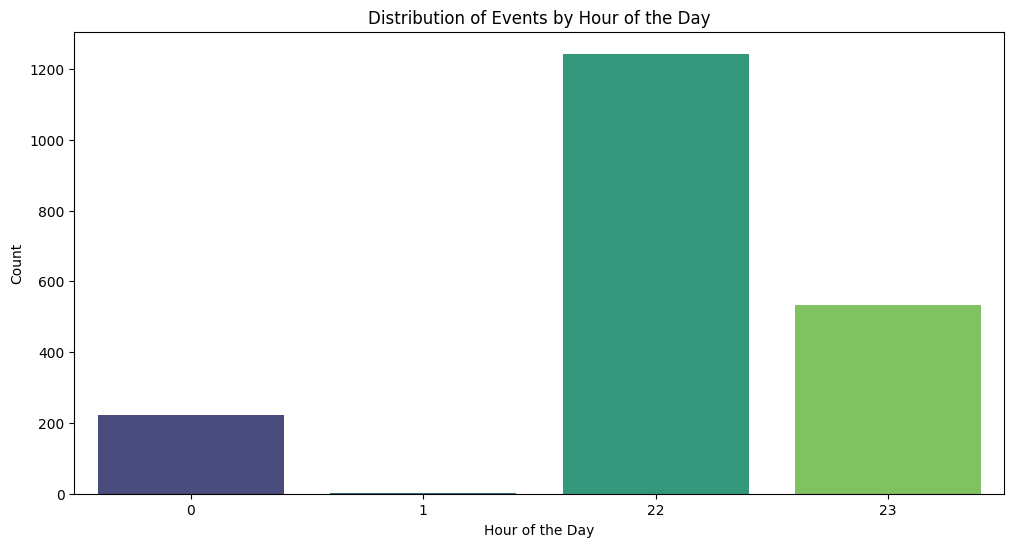

In [8]:
# Visualize the distribution of events by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='HourOfDay', data=log_data, palette='viridis')
plt.title('Distribution of Events by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

Inference from the above ContPlot:

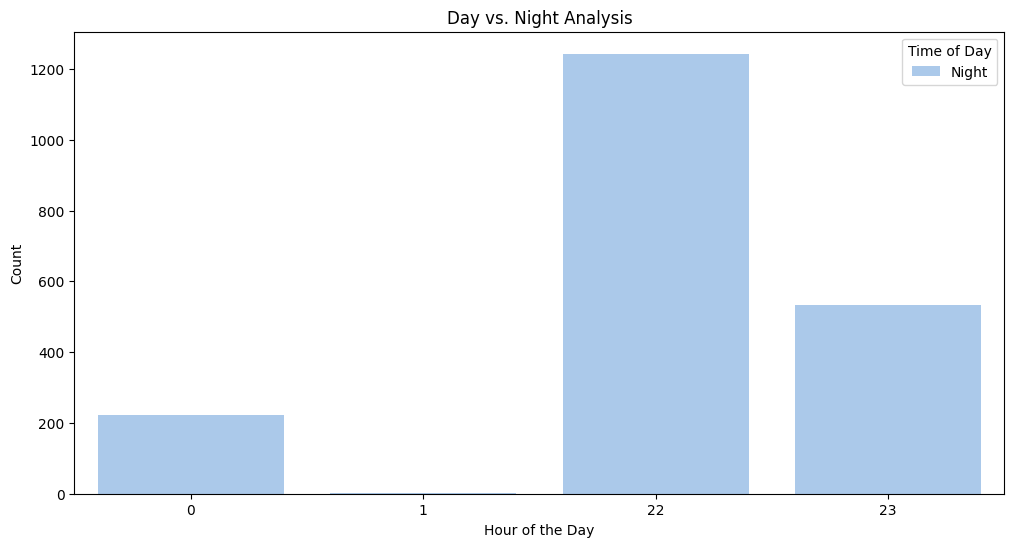

In [31]:
log_data["HourOfDay"] = log_data["Time"].dt.hour

# Countplot for day vs. night events
plt.figure(figsize=(12, 6))
sns.countplot(x="HourOfDay", data=log_data, palette="pastel", hue=log_data["HourOfDay"].apply(lambda x: "Day" if 6 <= x < 18 else "Night"))
plt.title("Day vs. Night Analysis")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.legend(title="Time of Day")
plt.show()


## Top 10 Most Frequent Events

In [9]:
# Visualizing top N events (considering n=10)
top_events = log_data['EventTemplate_x'].value_counts().nlargest(10)

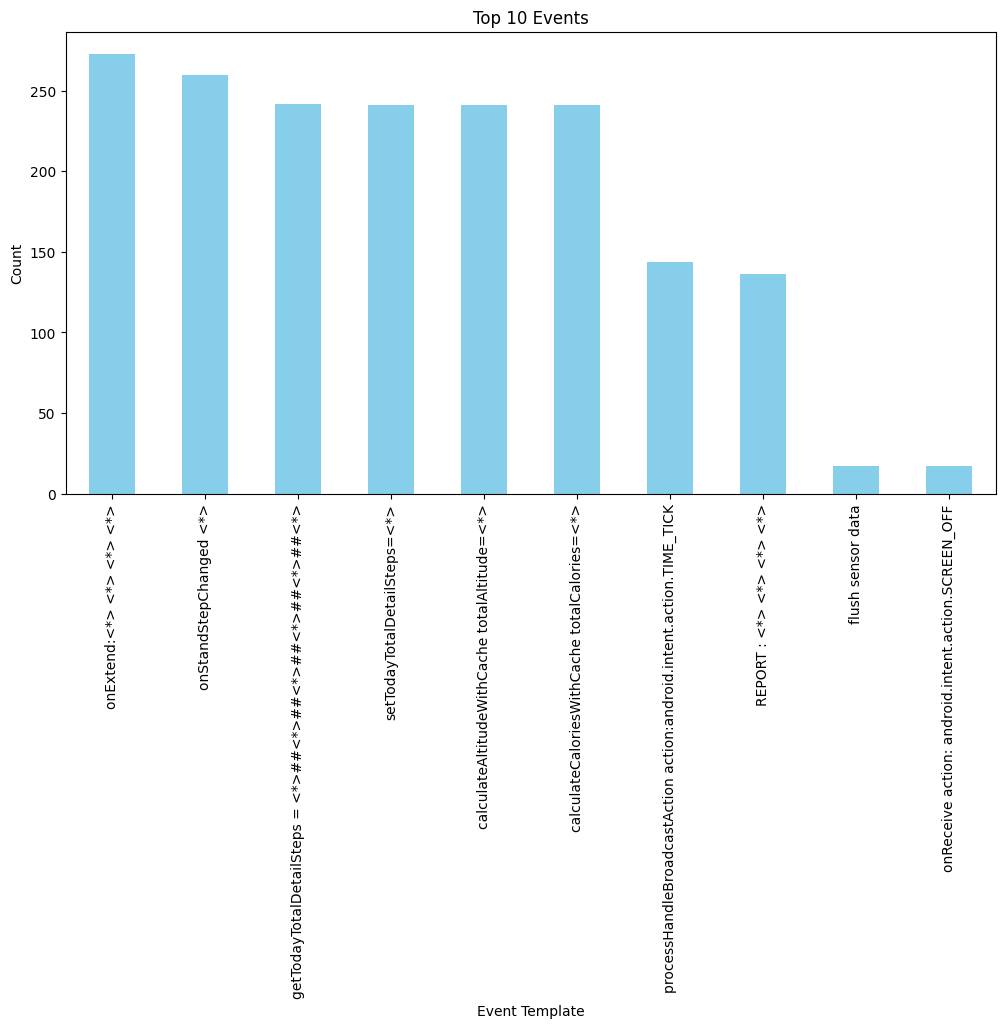

In [10]:
plt.figure(figsize=(12, 6))
top_events.plot(kind='bar', color='skyblue')
plt.title('Top 10 Events')
plt.xlabel('Event Template')
plt.ylabel('Count')
plt.show()


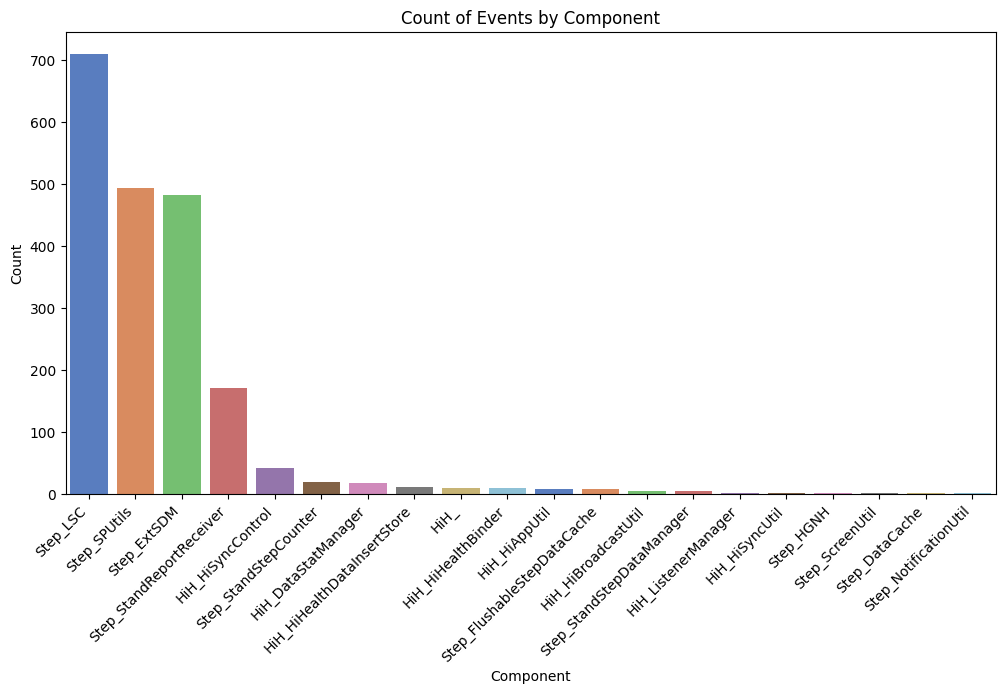

In [11]:
# Visualizing count of events by component
plt.figure(figsize=(12, 6))
sns.countplot(x='Component', data=log_data, palette='muted', order=log_data['Component'].value_counts().index)
plt.title('Count of Events by Component')
plt.xlabel('Component')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualizing count of the events by day of the week

In [12]:
log_data['DayOfWeek'] = pd.to_datetime(log_data['Time']).dt.day_name()

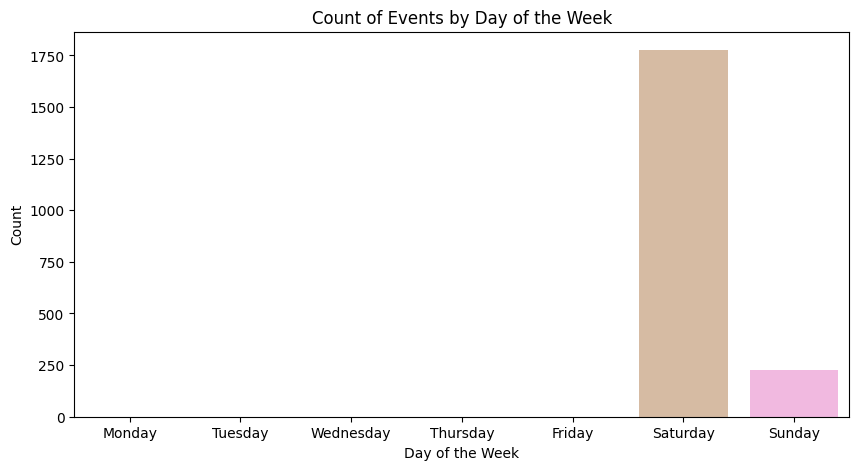

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x='DayOfWeek', data=log_data, palette='pastel', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Count of Events by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

In [16]:
# Filtering the rows related to workouts
workout_df = log_data[log_data["EventTemplate"].str.contains("onStandStepChanged")]

In [25]:
# Calculate daily workout times
workout_df["Date"] = workout_df["Time"].dt.date
daily_workout_times = workout_df.groupby("Date")["Time"].count()

C:\Users\Kshitij Kumar\AppData\Local\Temp\ipykernel_15284\3650110930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workout_df["Date"] = workout_df["Time"].dt.date


In [18]:
# Calculate daily step counts
step_df = log_data[log_data["Component"] == "Step_StandReportReceiver"]
step_df["Date"] = step_df["Time"].dt.date
daily_step_counts = (
    step_df["Content"].str.extract(r"REPORT : (\d+)")[0].fillna(0).astype(int).groupby(step_df["Date"]).sum()
)

C:\Users\Kshitij Kumar\AppData\Local\Temp\ipykernel_15284\1443726807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step_df["Date"] = step_df["Time"].dt.date


In [19]:
# Calculate active times (hourly step counts)
active_times = log_data[log_data["Component"] == "Step_StandReportReceiver"]
active_times["Hour"] = active_times["Time"].dt.hour
hourly_active_counts = (
    active_times["Content"].str.extract(r"REPORT : (\d+)")[0].fillna(0).astype(int).groupby(active_times["Hour"]).sum()
)


C:\Users\Kshitij Kumar\AppData\Local\Temp\ipykernel_15284\4224307764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_times["Hour"] = active_times["Time"].dt.hour


# Daily Workout Times

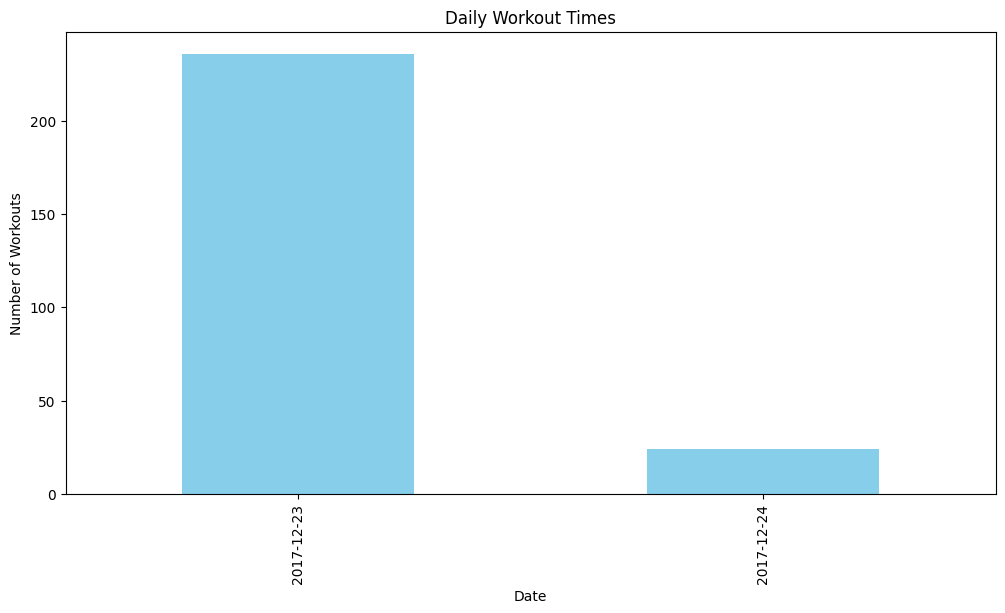

In [20]:
# Daily Workout Times
plt.figure(figsize=(12, 6))
daily_workout_times.plot(kind="bar", color="skyblue")
plt.title("Daily Workout Times")
plt.xlabel("Date")
plt.ylabel("Number of Workouts")
plt.show()

# Daily Step Counts

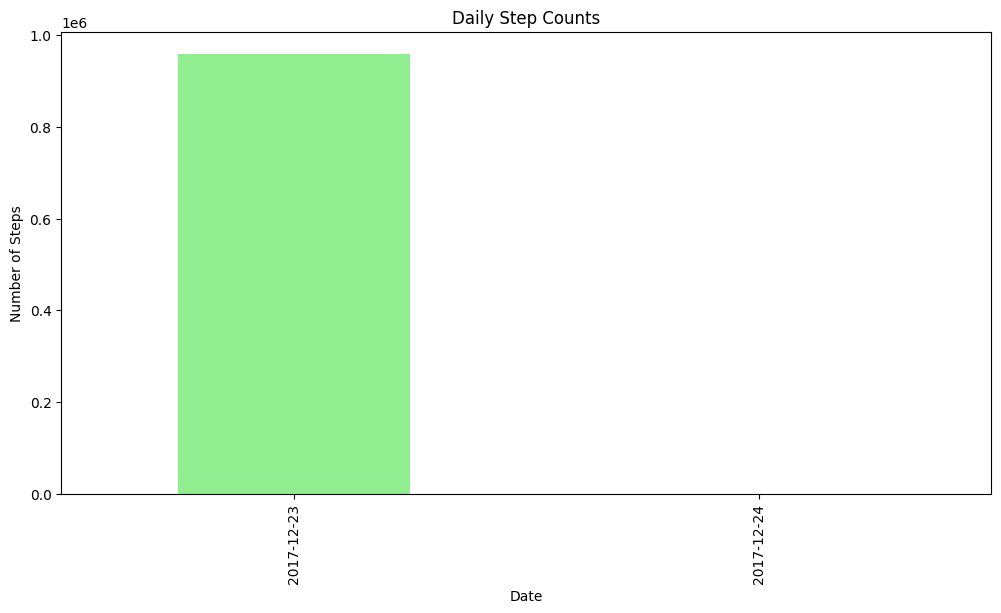

In [21]:
# Daily Step Counts
plt.figure(figsize=(12, 6))
daily_step_counts.plot(kind="bar", color="lightgreen")
plt.title("Daily Step Counts")
plt.xlabel("Date")
plt.ylabel("Number of Steps")
plt.show()

# Hourly Active Times

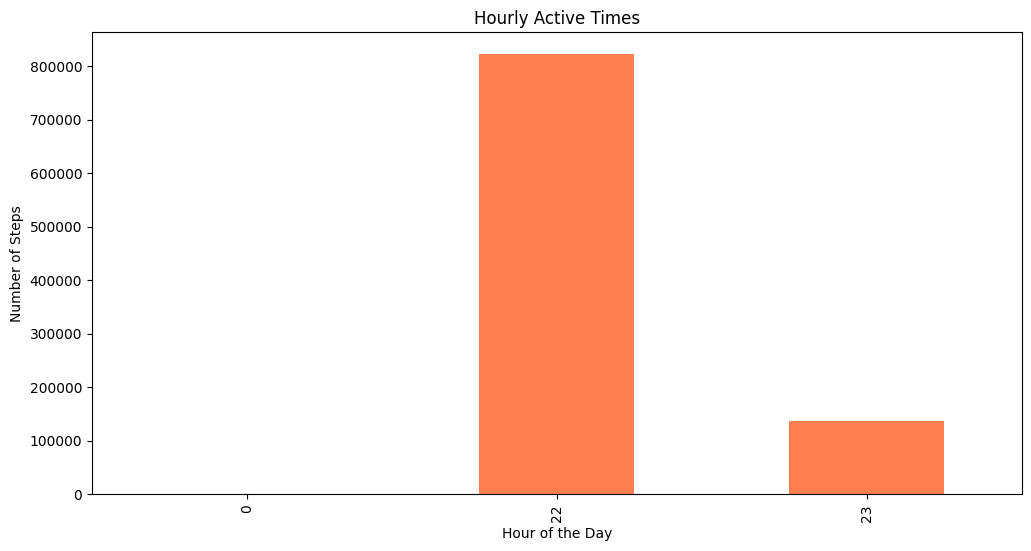

In [22]:
# Hourly Active Times
plt.figure(figsize=(12, 6))
hourly_active_counts.plot(kind="bar", color="coral")
plt.title("Hourly Active Times")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Steps")
plt.show()

# Wordcloud

In [33]:
!pip install wordcloud

     ------------------------------------ 300.0/300.0 kB 475.8 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


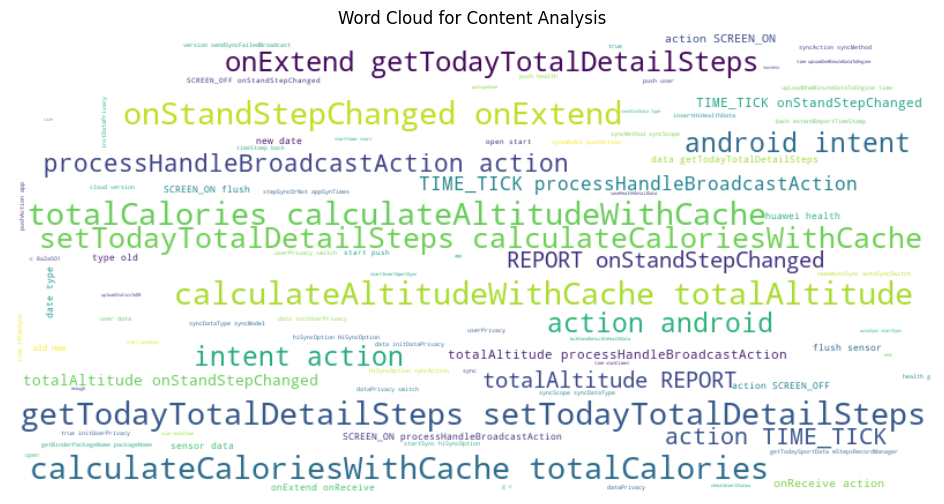

In [34]:
from wordcloud import WordCloud

# Generating a Word Cloud for the 'Content' column
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(log_data["Content"]))

# Plot the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Content Analysis")
plt.show()
